In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pathlib import Path

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape
from IPython.display import Image

from statsmodels. graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARMA 

%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
pd.options.display.float_format='{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings('ignore')


print(os.getcwd())
datpath=Path('C:/Users/hiwuq/OneDrive/Qian Learning/ML/Datasets')
print(datpath)

C:\Users\hiwuq
C:\Users\hiwuq\OneDrive\Qian Learning\ML\Datasets


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,...,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,...,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,...,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,...,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,...,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08
2016-01-11 17:50:00,50,40,19.89,46.03,19.20,44.50,19.79,44.93,18.89,45.73,...,17.00,45.29,6.02,734.00,92.00,5.33,43.83,4.80,44.92,44.92
2016-01-11 18:00:00,60,50,19.89,45.77,19.20,44.50,19.79,44.90,18.89,45.79,...,17.00,45.29,5.90,734.10,92.00,5.00,40.00,4.70,47.23,47.23
2016-01-11 18:10:00,60,50,19.86,45.56,19.20,44.50,19.73,44.90,18.89,45.86,...,17.00,45.29,5.92,734.17,91.83,5.17,40.00,4.68,33.04,33.04
2016-01-11 18:20:00,60,40,19.79,45.60,19.20,44.43,19.73,44.79,18.89,45.79,...,17.00,45.29,5.93,734.23,91.67,5.33,40.00,4.67,31.46,31.46


<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

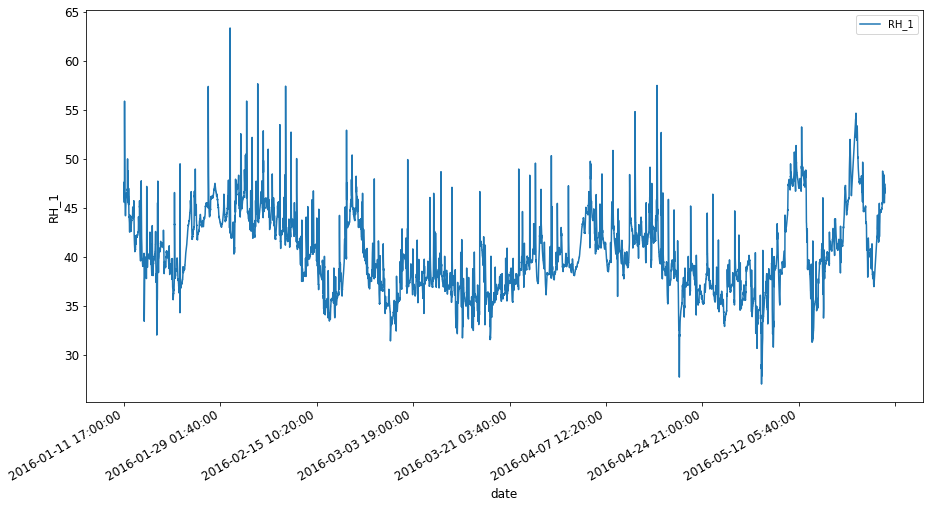

In [3]:
energy=pd.read_csv(datpath/'energydata.csv',header=0, index_col=0)
display(energy.head(10))
energy.info()

energy.plot(y='RH_1', subplots=True, figsize=(15,8), fontsize=12)
plt.xlabel('date',fontsize=12)
plt.ylabel('RH_1',fontsize=12)
plt.show()

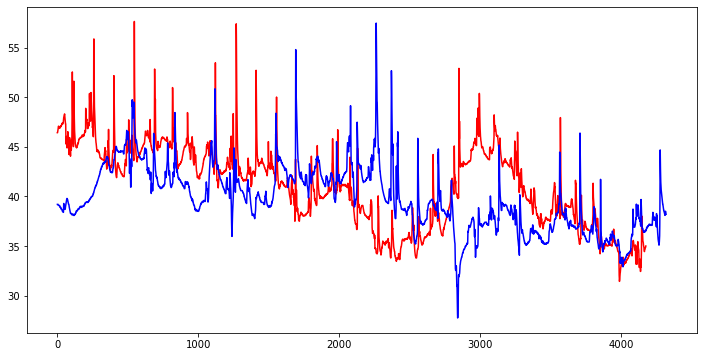

(4176, 2) (4320, 2)


In [25]:
signal1_o=energy['RH_1'][(energy.index>='2016-02-01 00:00:00')&(energy.index<'2016-03-01 00:00:00')].reset_index()
signal2_o=energy['RH_1'][(energy.index>='2016-04-01 00:00:00')&(energy.index<'2016-05-01 00:00:00')].reset_index()

plt.plot(signal1_o['RH_1'],color='red')
plt.plot(signal2_o['RH_1'],color='blue')
plt.show()

print(signal1_o.shape,signal2_o.shape)

signal=pd.DataFrame([[signal1_o['RH_1'][i],signal2_o['RH_1'][i]] for i in range(4176)],columns=['s1','s2'])

Pearson r:0.2941620677374743 and p-value:3.887131962649814e-84


<AxesSubplot:>

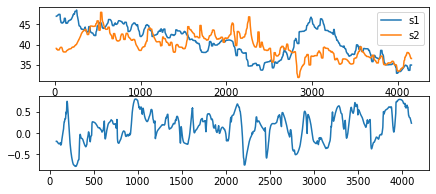

In [34]:
import seaborn as sns
import scipy.stats as stats

r,p=stats.pearsonr(signal['s1'],signal['s2'])
print(f"Pearson r:{r} and p-value:{p}")

f,axes=plt.subplots(2,1,figsize=(7,3))
signal.rolling(window=30,center=True).median().plot(ax=axes[0])
signal['s1'].rolling(window=144,center=True).corr(signal['s2']).plot(ax=axes[1])


In [37]:
def TLCC(x,y,lag=0,wrap=Flase):
    if wrap:
        ys=y.shift(lag)
        ys.iloc[:lag]=y.iloc[-lag:].values
        return  x.corr(ys)
    else:
        return  x.corr(y.shift(lag))
    


0    nan
1    nan
2    nan
3   1.00
dtype: float64
